In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

Build a ML predictive model to predict whether customer will leave/exit or continue using the banking service using the following bank data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['Exited'].unique()

array([1, 0])

In [5]:
#drop the columns not required to build a ml model

df1 = df.drop(columns = ['RowNumber',	'CustomerId', 'Surname'])
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


EDA - Exploratory Data Analysis

Univariate Analysis - Analysing one data column at a time
Bivariate Analysis - Analysing two data column at a time and their effect on each other
Multivariate Analysis - Analysing mutilple data column at a time and their effect on each other
Univariate Analysis

* Categorical column
* Continous column

In [6]:
#Categorical

print(df1['Geography'].unique())
print(df1['Gender'].unique())
print(df1['NumOfProducts'].unique())
print(df1['HasCrCard'].unique())
print(df1['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [7]:
#frequency of categorical values

print(df1['Geography'].value_counts())
print()
print(df1['Gender'].value_counts())
print()
print(df1['NumOfProducts'].value_counts())
print()
print(df1['HasCrCard'].value_counts())
print()
print(df1['IsActiveMember'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender
Male      5457
Female    4543
Name: count, dtype: int64

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64


<Axes: xlabel='Geography'>

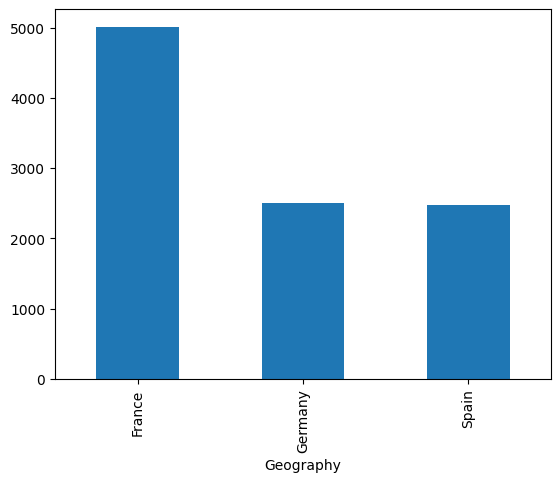

In [8]:
df1['Geography'].value_counts().plot.bar()

<Axes: ylabel='count'>

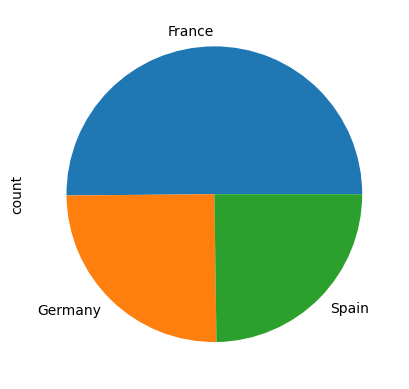

In [9]:
df1['Geography'].value_counts().plot.pie()

<Axes: xlabel='Gender'>

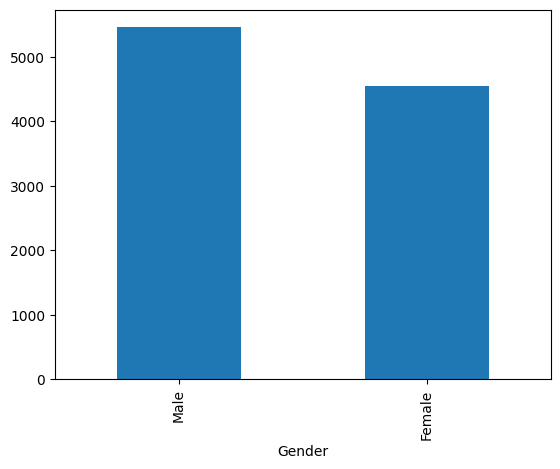

In [10]:
df1['Gender'].value_counts().plot.bar()

<Axes: xlabel='NumOfProducts'>

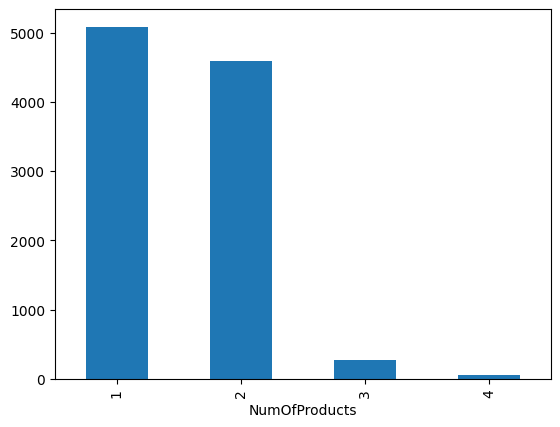

In [11]:
df1['NumOfProducts'].value_counts().plot.bar()

<Axes: xlabel='HasCrCard'>

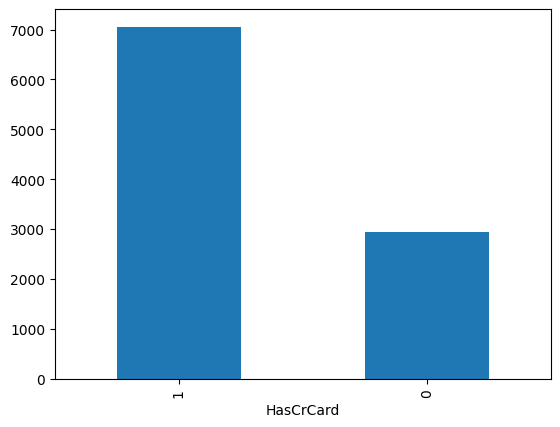

In [12]:
df1['HasCrCard'].value_counts().plot.bar()

<Axes: xlabel='IsActiveMember'>

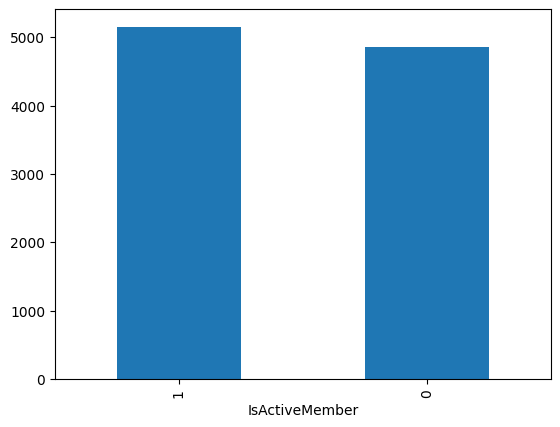

In [13]:
df1['IsActiveMember'].value_counts().plot.bar()

NumOfProduct column

* it has approx 50% samples representing category 1
* approx 45% samples with category 2
* rest 5% is category 3 & 4
* as for category 3 & 4 we have very less samples in comparasion to 1 & 2
* we can combine 2,3 & 4 to handle biasness


In [14]:
#user define function to combine 2,3 & 4

def combine_numofproducts(value):
    if value == 1:
        return value
    else:
        return 2

In [15]:
combine_numofproducts(1)

1

In [16]:
df1['NumOfProducts'] = df1['NumOfProducts'].apply(combine_numofproducts)

<Axes: xlabel='NumOfProducts'>

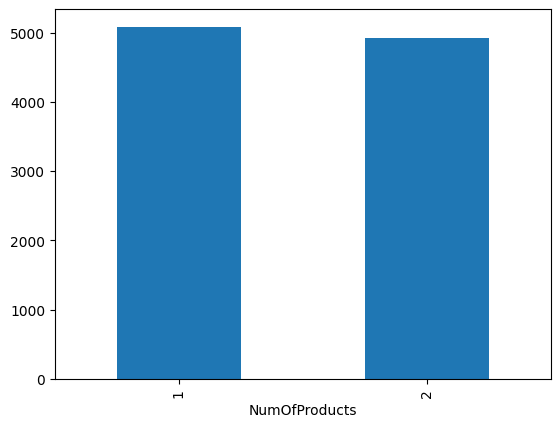

In [17]:
df1['NumOfProducts'].value_counts().plot.bar()

Univariate Analysis on Continous columns

In [18]:
df1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [19]:
print('Credit Score')
print(df1['CreditScore'].mean())
print(df1['CreditScore'].min())
print(df1['CreditScore'].max())
print()
print('Age')
print(df1['Age'].mean())
print(df1['Age'].min())
print(df1['Age'].max())
print()
print('Balance')
print(df1['Balance'].mean())
print(df1['Balance'].min())
print(df1['Balance'].max())
print()

Credit Score
650.5288
350
850

Age
38.9218
18
92

Balance
76485.889288
0.0
250898.09



Histogram plot for continous values

<Axes: ylabel='Frequency'>

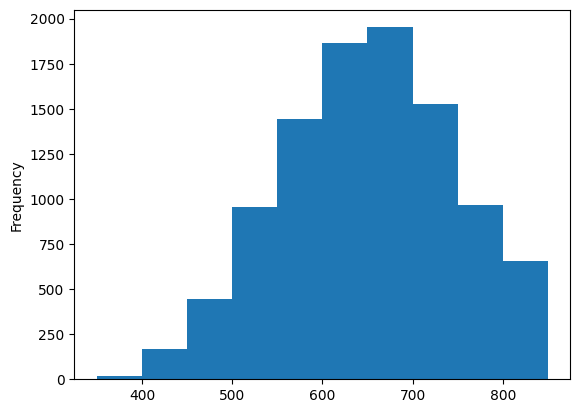

In [20]:
df1['CreditScore'].plot.hist()

<Axes: ylabel='Frequency'>

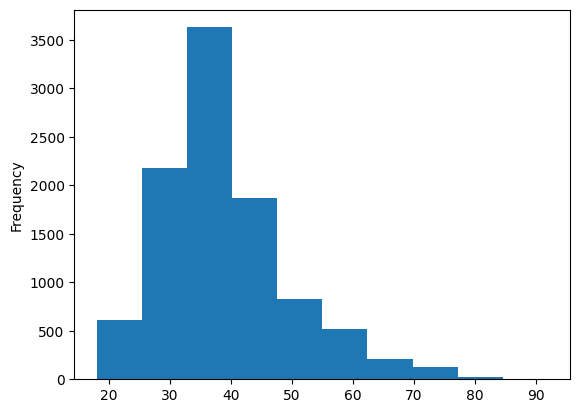

In [21]:
df1['Age'].plot.hist()

<Axes: ylabel='Frequency'>

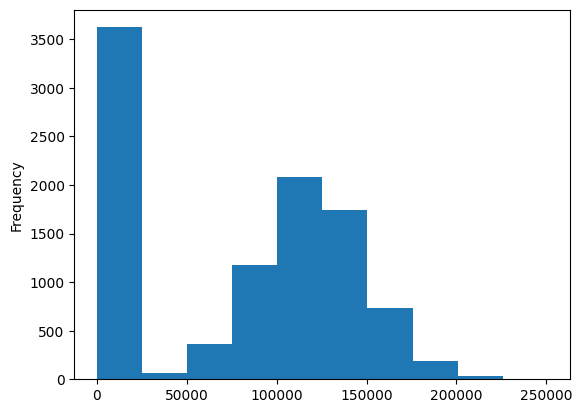

In [22]:
df1['Balance'].plot.hist()

<Axes: ylabel='Frequency'>

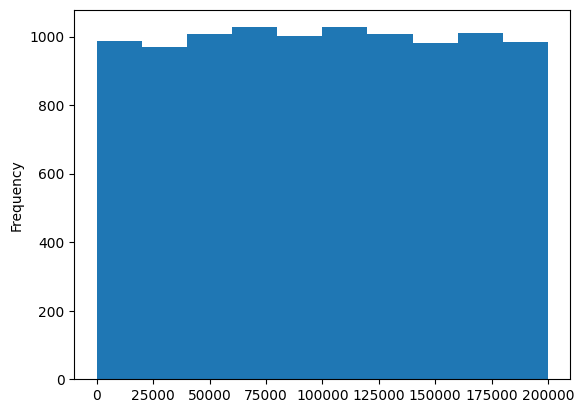

In [23]:
df1['EstimatedSalary'].plot.hist()

Bivariate Analysis

* categorical & categorical
* categorical & continous
* continous & continous

In [24]:
df1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,2,1,0,113931.57,1


In [25]:
#categorical vs categorical

pd.crosstab(df1['Geography'] , df1['Gender'])

Gender,Female,Male
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


<Axes: xlabel='Geography'>

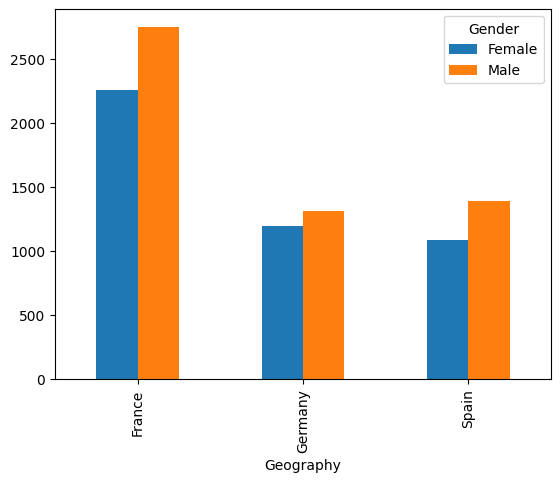

In [26]:
pd.crosstab(df1['Geography'] , df1['Gender']).plot.bar()

In [28]:
#Exit of customers from each country
pd.crosstab(df1['Geography'], df1['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


<Axes: xlabel='Geography'>

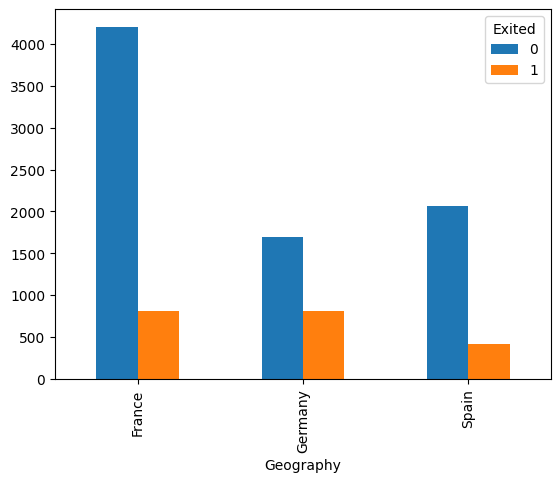

In [29]:
pd.crosstab(df1['Geography'], df1['Exited']).plot.bar()

<Axes: xlabel='Gender'>

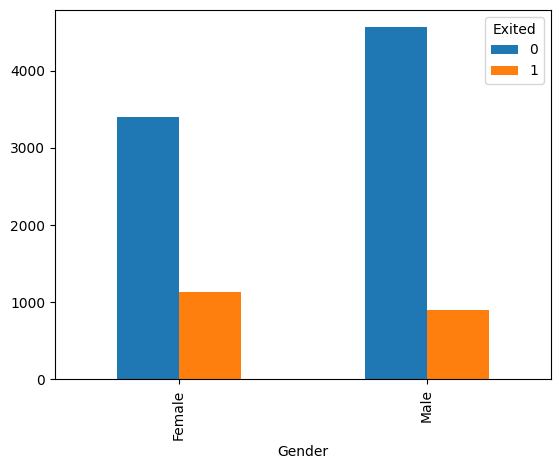

In [30]:
#Exit of customer as 'Male' and 'Female'
pd.crosstab(df1['Gender'], df1['Exited']).plot.bar()

<Axes: xlabel='NumOfProducts'>

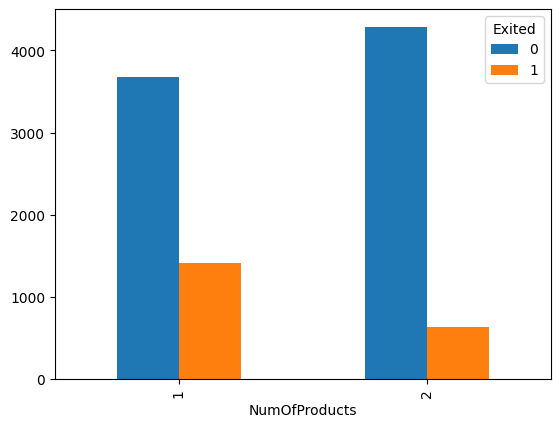

In [31]:
#Exit of Customer as numofproducts 1 and 2
pd.crosstab(df1['NumOfProducts'], df1['Exited']).plot.bar()

<Axes: xlabel='HasCrCard'>

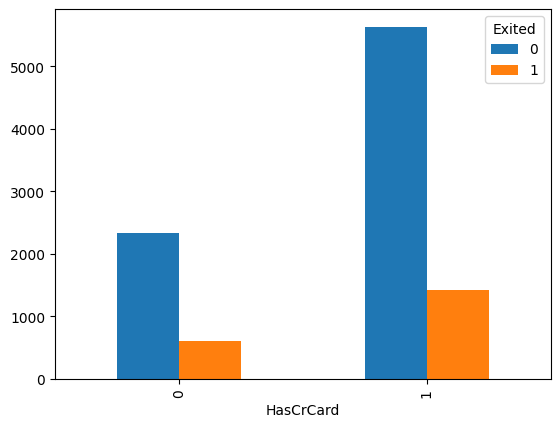

In [32]:
#Exit of customers as "Has cr card = 1" and "Has cr card = 0"
pd.crosstab(df1['HasCrCard'], df1['Exited']).plot.bar()

In [33]:
df1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [34]:
df1['Age'].mean()

np.float64(38.9218)

In [35]:
df1.Age.mean()

np.float64(38.9218)

In [36]:
#Categorical & Continous

#Average age of customers from each geographical location
#Geography => categorical
#Age => Continous

#groupby()

df1.groupby('Geography').Age.mean()

Geography
France     38.511767
Germany    39.771622
Spain      38.890997
Name: Age, dtype: float64

In [37]:
#Average age of Male & female customers
df1.groupby('Gender').Age.mean()

Gender
Female    39.238389
Male      38.658237
Name: Age, dtype: float64

In [38]:
df1['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [39]:
#Average balance if exit = 1 and average balance if exit = 0

df1.groupby('Exited').Balance.mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

<Axes: xlabel='Exited'>

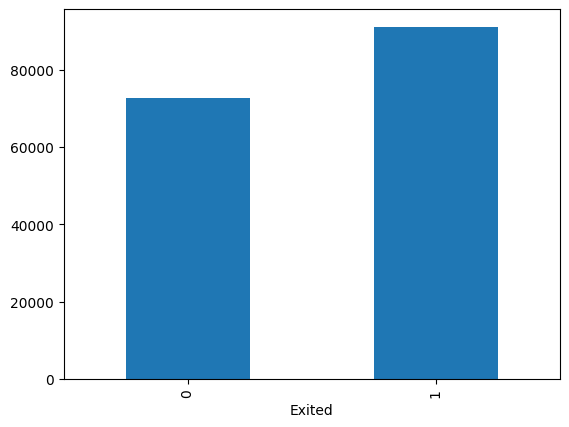

In [40]:
df1.groupby('Exited').Balance.mean().plot.bar()

In [41]:
#Average estimated_salary if exit = 1 and average estimated_salary if exit = 0

df1.groupby('Exited')['EstimatedSalary'].mean()

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

In [42]:
df1.groupby('Exited')['EstimatedSalary'].agg(['mean' , 'min' , 'max' , 'count'])

,mean,min,max,count
Exited,,,,
0,99738.391772,90.07,199992.48,7963
1,101465.677531,11.58,199808.10,2037


In [43]:
#Average , Minimum , Maximum age of customers for exit = 0 and exit = 1

df1.groupby('Exited')['Age'].agg(['mean' , 'min' , 'max'])

,mean,min,max
Exited,,,
0,37.408389,18,92
1,44.837997,18,84


In [44]:
#Continous & Continous

#correlation between Age and Balance

df1[['CreditScore' , 'Age' , 'Balance' , 'EstimatedSalary' ]].corr()

,CreditScore,Age,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.006268,-0.001384
Age,-0.003965,1.000000,0.028308,-0.007201
Balance,0.006268,0.028308,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.012797,1.000000


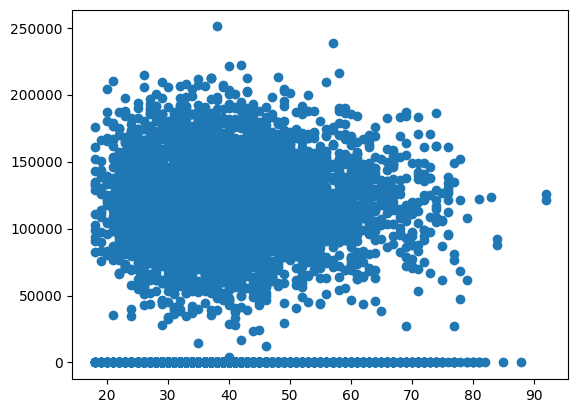

In [45]:
plt.scatter(df1['Age'] , df1['Balance'])
plt.show()

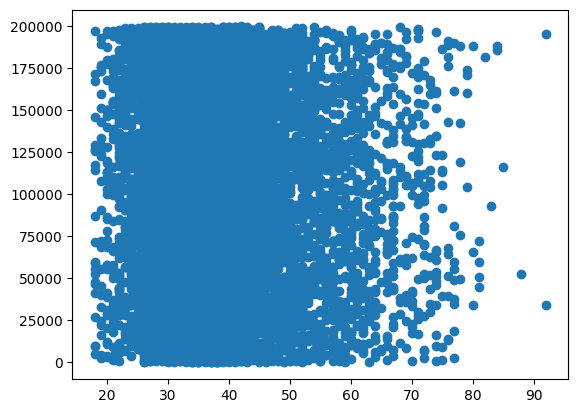

In [46]:
plt.scatter(df1['Age'] , df1['EstimatedSalary'])
plt.show()

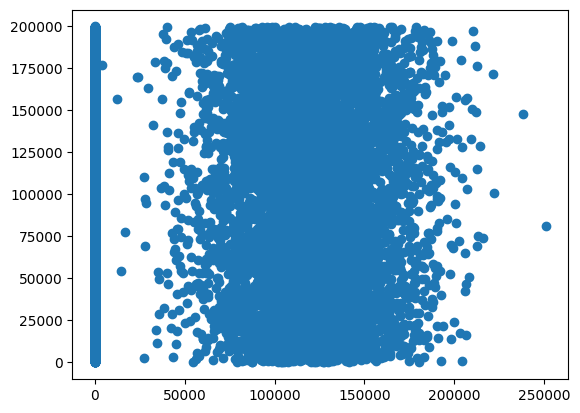

In [47]:
plt.scatter(df1['Balance'] , df1['EstimatedSalary'])
plt.show()

In [48]:
#Calculation of corelation
x1 = df1['Balance']
x2 = df1['EstimatedSalary']

n1 = ((x1 - x1.mean())*(x2 - x2.mean())).sum()

d1 = (((x1 - x1.mean())**2).sum() * ((x2 - x2.mean())**2).sum())**0.5

c1 = n1/d1
print(c1)

0.012797496340555693


In [49]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,2,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
#Create a copy of your data and store into a new variable
df2 = df1.copy()

Label Encoding

* On Gender column

In [51]:
df2['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [52]:
df2['Gender'] = df2['Gender'].map({'Female' : 0, 'Male': 1})

One-hot encoding

* On Geography column

In [53]:
geo_encoded = pd.get_dummies(df2['Geography'], dtype = int)
geo_encoded

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


combine df2 & geo_encoded

* for horizontal stacking use axis = 1

In [54]:
df3 = pd.concat((df2,geo_encoded) , axis = 1)
df3.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,2,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [55]:
#drop the 'Geography' column as it is already encoded

df3 = df3.drop(columns = ['Geography'])
df3.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,2,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


Define X & y as features and labels

* X = all columns but not 'Exited'
* y = only 'Exited' column

In [56]:
X = df3.drop(columns = ['Exited'])     #features
y = df3['Exited']                      #label

In [57]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Data Normalisation using Min-Max Scaler

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Xscaled = scaler.fit_transform(X)

We have biased dataset so we need to resample it for a balanced and unbiased predictive model

* downsampling - RandomUnderSampler
* upsampling - SMOTE

In [59]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler()

Xr,yr = ros.fit_resample(Xscaled,y)

In [60]:
print(yr.value_counts())

Exited
0    2037
1    2037
Name: count, dtype: int64


In [61]:
#Over Sampling

from imblearn.over_sampling import SMOTE

ros = SMOTE()

Xr,yr = ros.fit_resample(Xscaled,y)

In [62]:
print(yr.value_counts())

Exited
1    7963
0    7963
Name: count, dtype: int64


Split xtrain & xtest

In [63]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xr,yr,train_size = 0.75)

In [64]:
print(X.shape)
print(xtrain.shape)
print(xtest.shape)

(10000, 12)
(11944, 12)
(3982, 12)


Import algorithm (KNN) and train model

In [67]:
from sklearn.neighbors import KNeighborsClassifier

model_A = KNeighborsClassifier(n_neighbors = 5)

model_A.fit(xtrain,ytrain)

KNeighborsClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


Check model accuracy

In [70]:
ytrain_pred = model_A.predict(xtrain) #predicted values on training data

ytest_pred = model_A.predict(xtest)   #predicted values on test data

In [71]:
print("Accuracy of model on train data")
print((ytrain == ytrain_pred).sum()/len(xtrain))

Accuracy of model on train data
0.8682183523107837


In [72]:
print("Accuracy of model on test data")
print((ytest == ytest_pred).sum()/len(xtest))

Accuracy of model on test data
0.8071320944249121


ML Model Performance analysis using confusion matrix

In [73]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytrain , ytrain_pred))

[[4650 1310]
 [ 264 5720]]


In [74]:
print(confusion_matrix(ytest , ytest_pred))

[[1386  617]
 [ 151 1828]]


In [75]:
from sklearn.svm import SVC

model_B = SVC()

model_B.fit(xtrain,ytrain)

SVC()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [76]:
print("Accuarcy of SVM model on training Data")
print(model_B.score(xtrain,ytrain))

Accuarcy of SVM model on training Data
0.7744474212993971


In [77]:
print("Accuarcy of SVM model on test Data")
print(model_B.score(xtest,ytest))

Accuarcy of SVM model on test Data
0.7624309392265194


Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

model_C = DecisionTreeClassifier(max_depth=9)

model_C.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=9)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [79]:
print("Training Accuracy of Devision tree classifier-")
print(model_C.score(xtrain,ytrain))

Training Accuracy of Devision tree classifier-
0.8321332886805091


In [80]:
print("Test Accuracy of Devision tree classifier-")
print(model_C.score(xtest,ytest))

Test Accuracy of Devision tree classifier-
0.7963335007533903


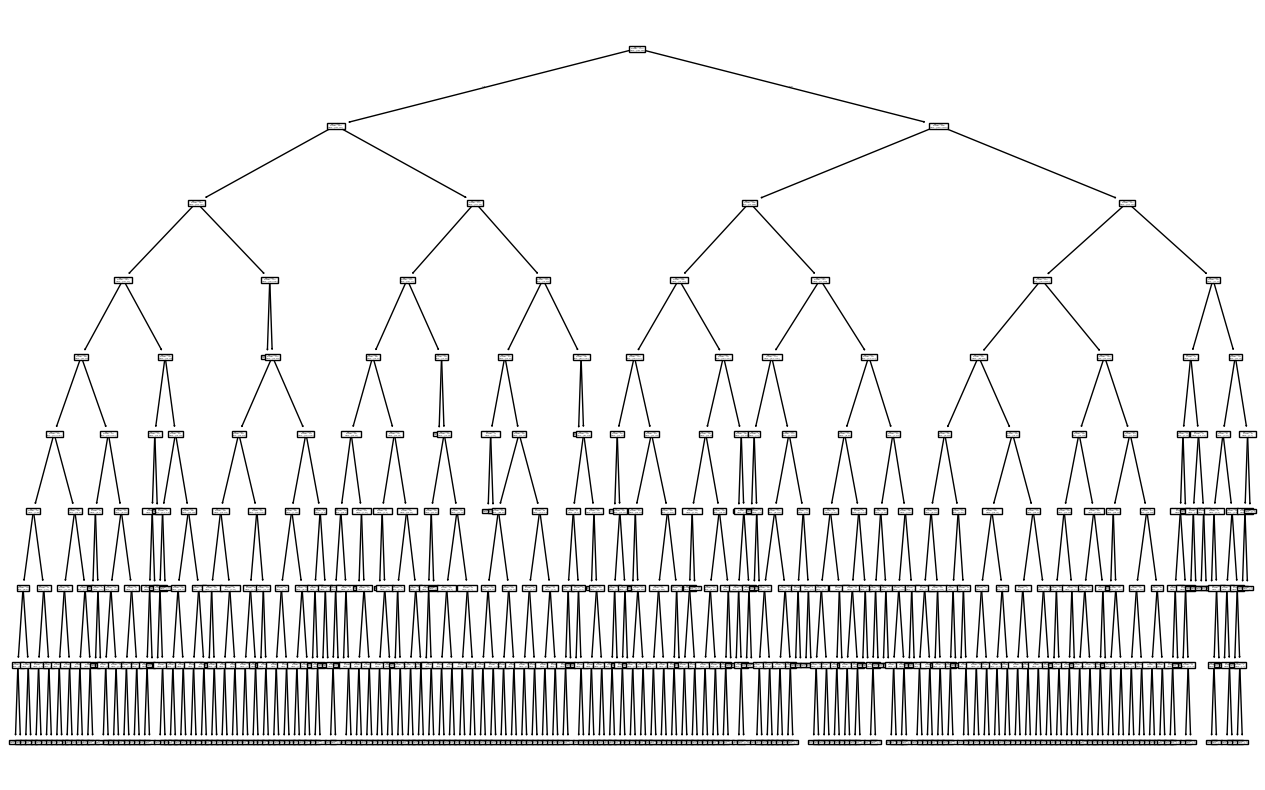

In [81]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (16,10))

plot_tree(model_C , feature_names=X.columns)

plt.show()


In [82]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,2,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [83]:
credit_score = 650
gender = 'Male'
age = 29
tenure = 2
balance = 10000
numofproducts = 1
hascrcard = 1
isactivemember = 1
estimated_salary = 50000
geography = 'Spain'

In [84]:
data_for_prediction = np.zeros(xtrain.shape[1])
print(data_for_prediction)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [85]:
def convert_gen_num(gender):
    if gender == 'Male':
        return 1
    else:
        return 0

In [86]:
data_for_prediction[0] = credit_score
data_for_prediction[1] = convert_gen_num(gender)
data_for_prediction[2] = age
data_for_prediction[3] = tenure
data_for_prediction[4] = balance
data_for_prediction[5] = numofproducts
data_for_prediction[6] = hascrcard
data_for_prediction[7] = isactivemember
data_for_prediction[8] = estimated_salary

In [87]:
list(X.columns).index(geography)

11

In [88]:
data_for_prediction[list(X.columns).index(geography)] = 1

In [89]:
print(data_for_prediction)

[6.5e+02 1.0e+00 2.9e+01 2.0e+00 1.0e+04 1.0e+00 1.0e+00 1.0e+00 5.0e+04
 0.0e+00 0.0e+00 1.0e+00]


In [90]:
#Data scaling as we used min max scaler before the model training

scaler.transform([data_for_prediction])

array([[0.6       , 1.        , 0.14864865, 0.2       , 0.03985682,
        0.        , 1.        , 1.        , 0.24996597, 0.        ,
        0.        , 1.        ]])

In [91]:
print(model_A.predict(scaler.transform([data_for_prediction])))             #KNN
print(model_B.predict(scaler.transform([data_for_prediction])))             #SVM
print(model_C.predict(scaler.transform([data_for_prediction])))             #Decision tree

[1]
[0]
[0]
